In [73]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import ray

In [37]:
df = pd.read_csv('distinct_subject_features.csv', dtype={"value": str})

In [64]:
df = df[pd.to_numeric(df['value'], errors='coerce').notnull()]
df['value'] = pd.to_numeric(df["value"], downcast="float")
df.head(10)

,subject_id,anchor_age,gender,label,value,valueuom,flag
7,17169886,68,M,Troponin T,0.02,ng/mL,abnormal
8,19458874,56,M,Oxygen Saturation,74.00,%,NaN
9,14814865,77,F,% Hemoglobin A1c,8.60,%,abnormal
10,16967171,70,F,Troponin T,0.05,ng/mL,abnormal
11,18562803,24,F,tacroFK,9.00,ng/mL,NaN
12,13758099,75,M,Troponin T,0.48,ng/mL,abnormal
13,14787989,54,F,"Total Protein, Urine",670.00,mg/dL,NaN
15,11639617,71,M,Troponin T,0.36,ng/mL,abnormal
16,18885039,85,M,Triglycerides,69.00,mg/dL,NaN
17,14454179,36,F,Troponin T,0.05,ng/mL,abnormal


In [152]:
df.shape

(7189894, 7)

In [186]:
x = df[df['subject_id']==10002155]
x[x['label']=='Alkaline Phosphatase']

,subject_id,anchor_age,gender,label,value,valueuom,flag


In [52]:
uniq_subjects = df.subject_id.unique()
uniq_subjects.shape

(21167,)

In [86]:
df[df['label']=='Creatinine'].subject_id.unique().shape

(21078,)

In [40]:
df.columns

Index(['subject_id', 'anchor_age', 'gender', 'label', 'value', 'valueuom',
       'flag'],
      dtype='object')

In [69]:
set_of_labels = set()
labels_dict = dict()
for subject_id in tqdm(uniq_subjects):
    uniq_labels = set(df[df['subject_id']==subject_id].label)
    for label in uniq_labels:
        if label not in labels_dict:
            labels_dict[label] = 1
        else:
            labels_dict[label] += 1 
            
#     #print(len(uniq_labels))
#     if len(set_of_labels) == 0:
#         set_of_labels = uniq_labels
#     else:
#         set_of_labels.union(uniq_labels)
#         print(len(set_of_labels))

100%|████████████████████████████████████████████████████████████| 21167/21167 [03:46<00:00, 93.50it/s]


In [107]:
len(labels_dict)

174

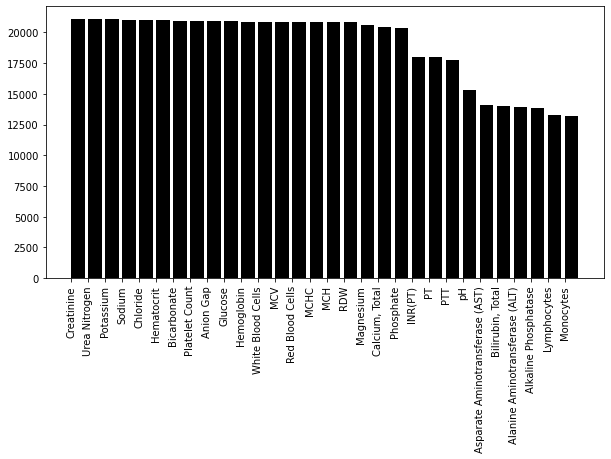

In [104]:

dict_sorted = dict(sorted(labels_dict.items(), key=lambda item: item[1], reverse=True))
names = list(dict_sorted.keys())[0:30]
values = list(dict_sorted.values())[0:30]

plt.figure(figsize=(10, 5))
plt.bar(range(30), values, tick_label=names, align='edge', color='black')
plt.xticks(rotation='vertical')
plt.show()

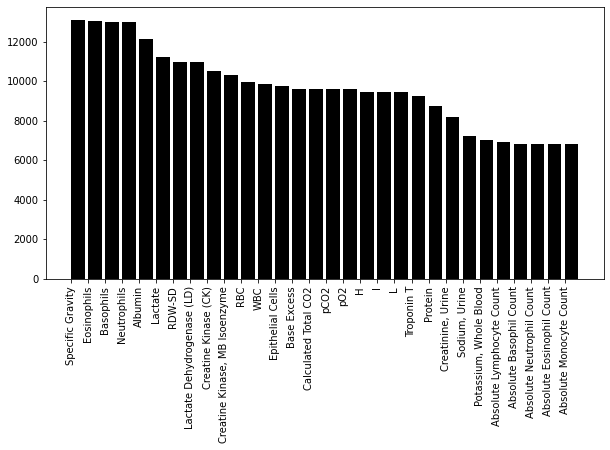

In [106]:
names = list(dict_sorted.keys())[30:60]
values = list(dict_sorted.values())[30:60]

plt.figure(figsize=(10, 5))
plt.bar(range(30), values, tick_label=names, align='edge', color='black')
plt.xticks(rotation='vertical')
plt.show()

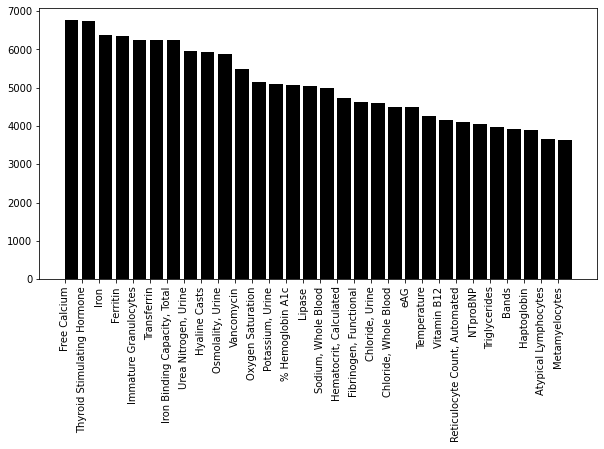

In [108]:
names = list(dict_sorted.keys())[60:90]
values = list(dict_sorted.values())[60:90]

plt.figure(figsize=(10, 5))
plt.bar(range(30), values, tick_label=names, align='edge', color='black')
plt.xticks(rotation='vertical')
plt.show()

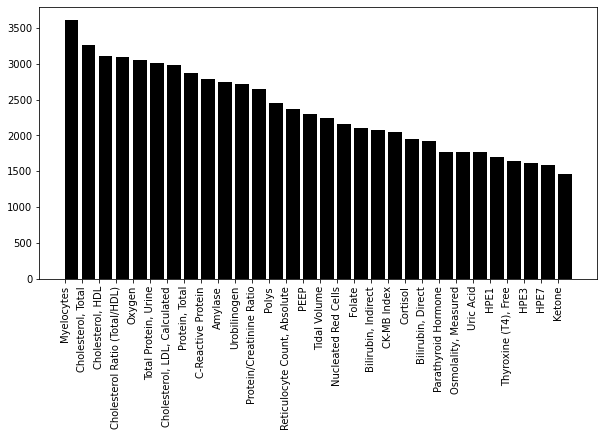

In [109]:
names = list(dict_sorted.keys())[90:120]
values = list(dict_sorted.values())[90:120]

plt.figure(figsize=(10, 5))
plt.bar(range(30), values, tick_label=names, align='edge', color='black')
plt.xticks(rotation='vertical')
plt.show()

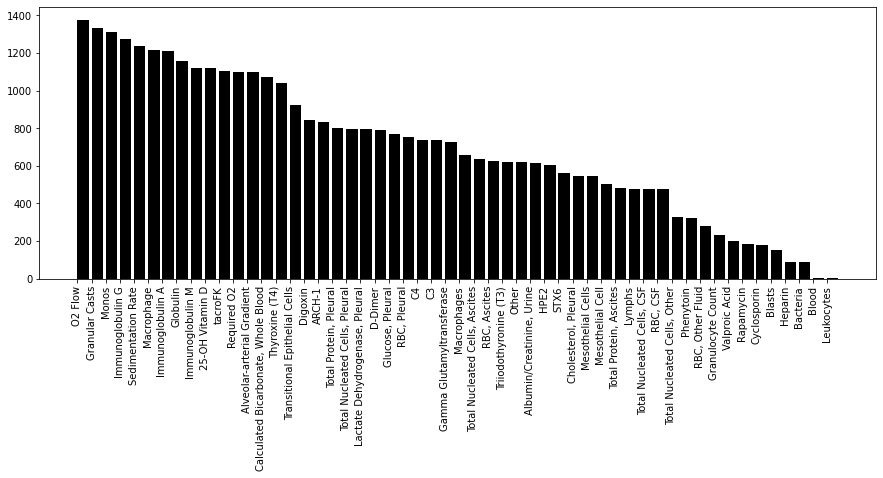

In [111]:
names = list(dict_sorted.keys())[120:]
values = list(dict_sorted.values())[120:]

plt.figure(figsize=(15, 5))
plt.bar(range(len(labels_dict)-120), values, tick_label=names, align='edge', color='black')
plt.xticks(rotation='vertical')
plt.show()

In [214]:
# lets take first 34 features
firstn_features = list(dict_sorted.keys())[:34]
firstn_count = list(dict_sorted.values())[:34]

#filter the df with onlys rows that contain firstn_features
#df_selected_features = df.loc[df.apply(lambda x: x.label in firstn_features, axis=1)]
df_selected_features = df.query('label in @firstn_features')

In [215]:
df_selected_features['flag'] = df_selected_features['flag'].replace(np.nan, 0)
df_selected_features.loc[df_selected_features["flag"] == "abnormal", "flag"] = 1
#df_selected_features.loc[df_selected_features["flag"] == np.nan, "flag"] = 0

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [216]:
df_selected_features

,subject_id,anchor_age,gender,label,value,valueuom,flag
22,16948106,79,F,Specific Gravity,1.009,,0
23,17316181,62,M,Specific Gravity,1.027,,0
27,12232510,52,M,Basophils,0.100,%,0
36,18455335,91,M,Specific Gravity,1.011,,0
45,15074305,55,M,Specific Gravity,1.032,,0
...,...,...,...,...,...,...,...
7278140,11301742,79,M,Asparate Aminotransferase (AST),12.000,IU/L,0
7278141,14166471,66,M,Asparate Aminotransferase (AST),98.000,IU/L,1
7278142,10916053,58,M,Asparate Aminotransferase (AST),790.000,IU/L,1
7278143,10371464,79,M,Asparate Aminotransferase (AST),19.000,IU/L,0


In [217]:
# now lets build a new datafarme with features as columns
#get all unique labels
labels = df_selected_features.label.unique()
labels

array(['Specific Gravity', 'Basophils', 'PT', 'pH', 'MCH', 'MCV', 'PTT',
       'RDW', 'MCHC', 'Sodium', 'Glucose', 'INR(PT)', 'Chloride',
       'Anion Gap', 'Magnesium', 'Monocytes', 'Phosphate', 'Potassium',
       'Creatinine', 'Hematocrit', 'Hemoglobin', 'Bicarbonate',
       'Eosinophils', 'Lymphocytes', 'Neutrophils', 'Urea Nitrogen',
       'Calcium, Total', 'Platelet Count', 'Red Blood Cells',
       'Bilirubin, Total', 'White Blood Cells', 'Alkaline Phosphatase',
       'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)'], dtype=object)

In [218]:
#manually create the table
# get all uniq subject ids
subj_ids = df_selected_features.subject_id.unique()
print(len(subj_ids))


21153


In [219]:
df_ = df_selected_features.pivot_table(values='value', index=['subject_id', 'anchor_age', 'gender'], columns='label', aggfunc=np.mean, fill_value=0)

In [220]:
#reste categorial columns
df_ = df_.reset_index()
df_

label,subject_id,anchor_age,gender,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total",...,Phosphate,Platelet Count,Potassium,RDW,Red Blood Cells,Sodium,Specific Gravity,Urea Nitrogen,White Blood Cells,pH
0,10000980,73,F,16.000000,61.000000,15.888889,19.000000,0.200000,23.111111,0.250000,...,4.318750,158.653839,4.292308,14.894444,2.781852,142.454544,1.009500,49.956520,5.104762,6.276667
1,10002013,53,F,17.500000,70.000000,16.625000,28.400000,0.500000,23.181818,0.500000,...,3.661538,248.954544,3.914286,12.250000,3.388182,138.375000,1.025000,18.181818,10.642105,6.920000
2,10002155,80,F,0.000000,0.000000,12.625000,0.000000,0.200000,25.500000,0.000000,...,4.137500,203.800003,4.925000,16.192858,3.395555,133.117645,1.013000,31.692308,6.012500,6.992500
3,10002430,86,M,50.500000,124.000000,12.500000,47.000000,0.100000,25.666666,0.650000,...,4.100000,160.750000,4.080000,16.233334,2.767500,140.199997,1.011000,49.200001,6.725000,7.000000
4,10003400,72,F,17.866667,85.235291,15.473684,47.285713,1.422222,21.739130,2.914286,...,3.066667,107.157143,3.960000,17.477551,2.811781,137.111115,1.018857,23.166666,6.214754,7.053478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21148,19997293,76,M,26.000000,151.666672,13.153846,31.000000,0.233333,30.153847,0.400000,...,3.452000,284.264709,4.200000,17.304762,3.331250,139.750000,1.011500,23.346153,11.819445,7.148000
21149,19997911,79,F,9.000000,51.000000,13.714286,22.000000,0.000000,31.000000,0.300000,...,4.018182,158.899994,3.900000,15.720000,3.092667,144.125000,1.017000,43.299999,8.060000,5.500000
21150,19998330,71,F,0.000000,0.000000,12.555555,0.000000,0.100000,37.538460,0.000000,...,3.738889,382.727264,4.629412,15.285714,3.082000,141.909088,1.009000,56.681820,7.771429,7.217500
21151,19998497,82,F,0.000000,0.000000,15.666667,0.000000,0.400000,23.400000,0.000000,...,4.244444,246.500000,4.481818,14.533334,2.936818,139.142853,1.019000,44.235294,8.910526,6.500000


In [221]:
for x in df_:
    df_.drop(df_.loc[df_[x]==0.00].index, inplace=True)

In [222]:
#df_.to_excel("filtered_dataset_table.xls")

In [223]:
df_

label,subject_id,anchor_age,gender,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total",...,Phosphate,Platelet Count,Potassium,RDW,Red Blood Cells,Sodium,Specific Gravity,Urea Nitrogen,White Blood Cells,pH
0,10000980,73,F,16.000000,61.000000,15.888889,19.000000,0.200000,23.111111,0.250000,...,4.318750,158.653839,4.292308,14.894444,2.781852,142.454544,1.009500,49.956520,5.104762,6.276667
1,10002013,53,F,17.500000,70.000000,16.625000,28.400000,0.500000,23.181818,0.500000,...,3.661538,248.954544,3.914286,12.250000,3.388182,138.375000,1.025000,18.181818,10.642105,6.920000
3,10002430,86,M,50.500000,124.000000,12.500000,47.000000,0.100000,25.666666,0.650000,...,4.100000,160.750000,4.080000,16.233334,2.767500,140.199997,1.011000,49.200001,6.725000,7.000000
4,10003400,72,F,17.866667,85.235291,15.473684,47.285713,1.422222,21.739130,2.914286,...,3.066667,107.157143,3.960000,17.477551,2.811781,137.111115,1.018857,23.166666,6.214754,7.053478
10,10004733,51,M,57.250000,120.142860,16.750000,75.099998,0.440000,24.000000,0.783333,...,3.388235,217.210526,3.866667,15.900000,3.075556,143.899994,1.018667,31.400000,6.870588,6.715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21142,19991805,80,F,16.000000,67.000000,16.555555,19.000000,0.300000,23.333334,0.300000,...,4.726666,204.600006,4.400000,17.837500,2.650667,143.333328,1.012667,71.166664,5.936364,6.915000
21144,19993776,83,M,28.000000,83.000000,16.875000,19.000000,0.200000,27.500000,0.400000,...,4.400000,216.777771,3.854545,15.140000,3.388750,138.199997,1.011000,73.599998,9.000000,5.500000
21145,19993951,72,M,18.200001,128.928574,19.307692,30.181818,1.250000,24.916666,2.175000,...,3.912000,122.360001,3.752941,16.355000,3.175714,133.800003,1.007000,55.135136,4.552941,6.715000
21146,19994379,68,M,91.227272,192.576920,15.500000,103.625000,0.600000,26.000000,0.875000,...,3.665517,186.550003,3.884211,16.804762,2.459556,137.055557,1.017400,36.558140,7.554054,7.056667
